# Pymaceuticals Inc.
---

### Analysis

#### Two observable points from this analysis:

-There is a strong correlation between mouse weight and average observed tumor (0.83).

-Based on the data shown in the Box Plot: Capomulin and Ramicane showed the lowest final tumor volume out of the 4 shown treatments.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_merge = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_merge["Mouse ID"].nunique()


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseID = mouse_merge[mouse_merge.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mouseID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_merge[mouse_merge["Mouse ID"] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_merge.drop(mouse_merge[mouse_merge["Mouse ID"] == 'g989'].index, inplace = True)
mouse_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_merge["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mouse_regimen = mouse_merge.groupby(["Drug Regimen"])
tumor_mean = mouse_regimen["Tumor Volume (mm3)"].mean()
tumor_median = mouse_regimen["Tumor Volume (mm3)"].median()
tumor_variance = mouse_regimen["Tumor Volume (mm3)"].var()
tumor_stddev = mouse_regimen["Tumor Volume (mm3)"].std()
tumor_stderr = mouse_regimen["Tumor Volume (mm3)"].sem()

mouse_regimen_summary = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                                      "Median Tumor Volume": tumor_median,
                                      "Tumor Volume Variance": tumor_variance,
                                      "Tumor Volume Std. Dev.": tumor_stddev,
                                      "Tumor Volume Std. Err.": tumor_stderr})

mouse_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

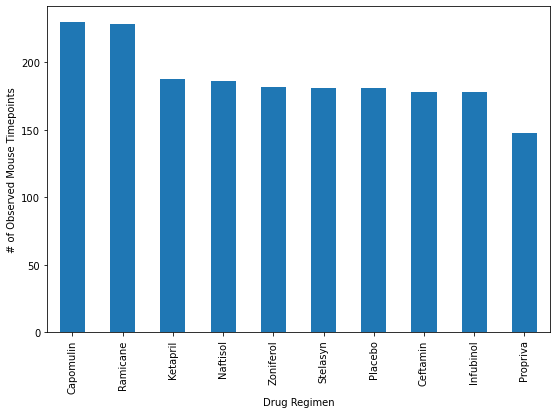

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = mouse_merge["Drug Regimen"].value_counts()
drug_regimen.plot(kind="bar", figsize=(9,6))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

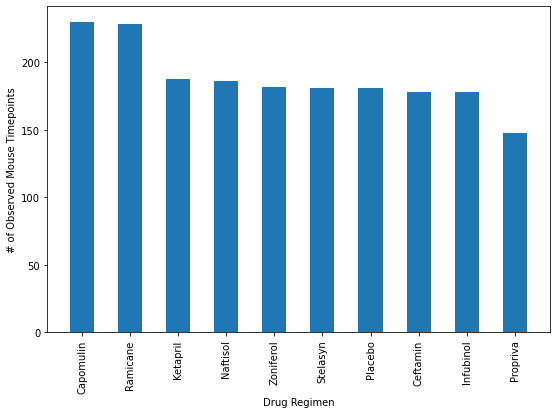

In [9]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

total_rows = mouse_merge["Drug Regimen"].value_counts()
x_axis = np.arange(len(total_rows))
tick_locations = [value for value in x_axis]
plt.figure(figsize= (9,6))
plt.bar(x_axis, total_rows, width=0.5)
drug_names = total_rows.index
plt.xticks(tick_locations, drug_names, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

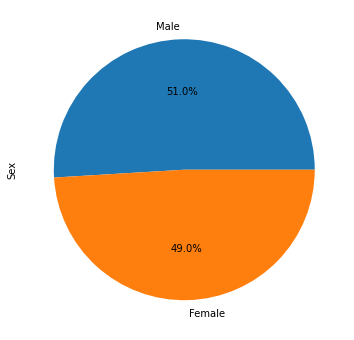

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot = mouse_merge["Sex"].value_counts()
pie_plot.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.ylabel("Sex")
plt.show()

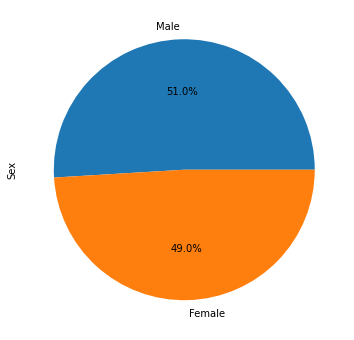

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_values = mouse_merge["Sex"].value_counts()
labels = ["Male", "Female"]
plt.figure(figsize= (6,6))
plt.ylabel("Sex")
plt.pie(pie_values, labels=labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_merge_max = mouse_merge.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_merge2 = pd.merge(mouse_merge_max, mouse_merge, on="Mouse ID")

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes and add subset
for treatment in treatments:
    fourtreat = mouse_merge2.loc[mouse_merge2["Drug Regimen"] == treatment]
    fourtreatmax = fourtreat.loc[fourtreat["Timepoint_y"] == fourtreat["Timepoint_x"]]
    tumors = fourtreatmax["Tumor Volume (mm3)"]
    tumor_data.append(tumors)
   
    # Determine outliers using upper and lower bounds
    quartiles = tumors.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = (tumors.loc[(fourtreatmax["Tumor Volume (mm3)"] <= lower_bound) | (fourtreatmax["Tumor Volume (mm3)"] >= upper_bound)]).unique()

    print(f"{treatment}: IQR is {iqr} and {outliers} is the outlier.")


Capomulin: IQR is 7.781863460000004 and [] is the outlier.
Ramicane: IQR is 9.098536719999998 and [] is the outlier.
Infubinol: IQR is 11.477135160000003 and [36.3213458] is the outlier.
Ceftamin: IQR is 15.577752179999997 and [] is the outlier.


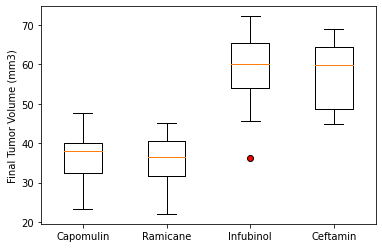

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
flierprops = dict(marker="o", markerfacecolor="r")
ax1.boxplot(tumor_data, flierprops=flierprops)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

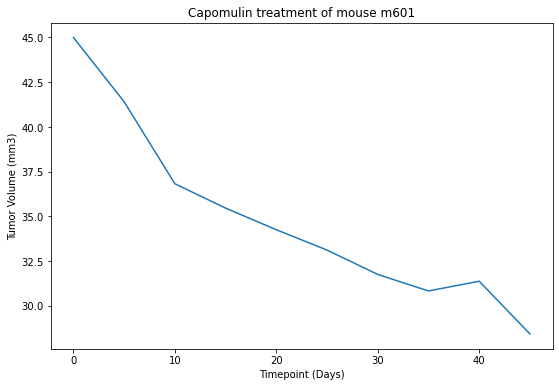

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_merge_capomulin = mouse_merge.loc[mouse_merge["Drug Regimen"] == 'Capomulin']
mouse_single = mouse_merge_capomulin.loc[mouse_merge_capomulin["Mouse ID"] == "m601"]

x_axis = mouse_single["Timepoint"]
y_axis = mouse_single["Tumor Volume (mm3)"]

plt.figure(figsize=(9,6))
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse m601")
plt.show()

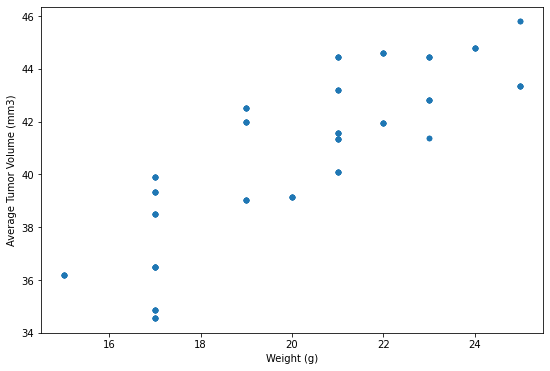

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor = pd.DataFrame(mouse_merge_capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index())
capomulin_merge = pd.merge(mouse_merge_capomulin, average_tumor, on="Mouse ID")
capomulin_merge.rename(columns= {'Tumor Volume (mm3)_y' : 'Average Tumor Volume (mm3)'}, inplace=True)
capomulin_merge.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", figsize=(9,6))
plt.show()

## Correlation and Regression

The correlation between mouse weight and average observed tumor is 0.83


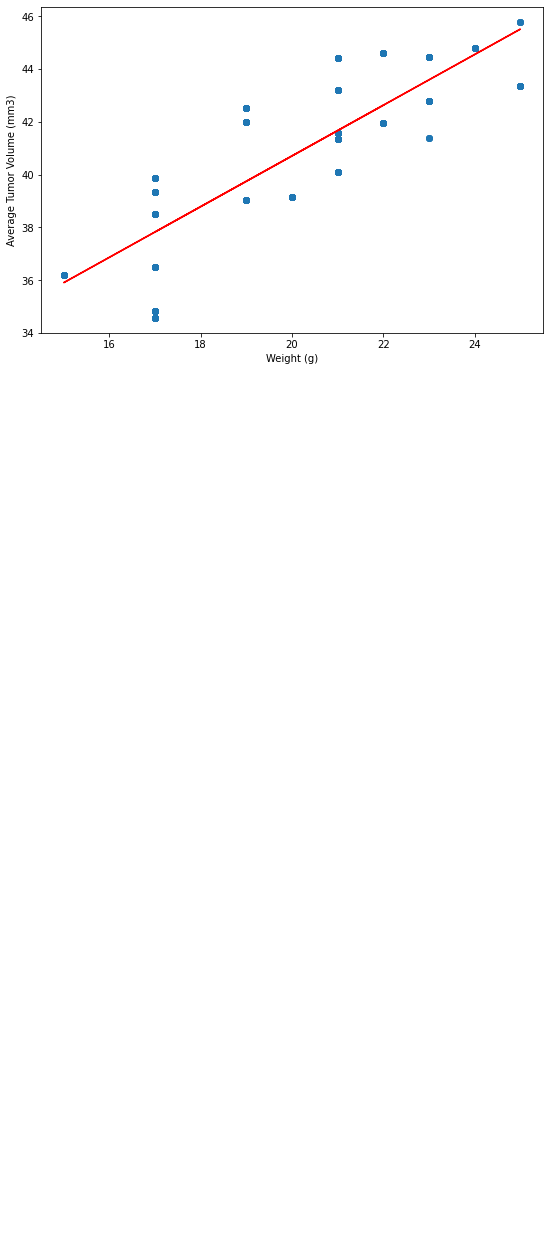

In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = capomulin_merge.iloc[:, 7]
average_observed = capomulin_merge.iloc[:, 8]
correlation = st.pearsonr(mouse_weight, average_observed)
print(f"The correlation between mouse weight and average observed tumor is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, average_observed)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,6))
plt.scatter(mouse_weight, average_observed)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,0),fontsize=15,color="red")
plt.show()